# Anvendt Statistik - Forelæsning 2
## Datatyper og Visualisering

Aalborg University Business School  
6. februar 2026

---

I denne notebook gennemgår vi:
1. Import og inspektion af data
2. Datatyper i Python/pandas
3. Univariate visualiseringer (histogram, bar chart, pie chart)
4. Bivariate visualiseringer (scatter plot, line plot, grouped bar chart)

## Del 1: Setup og Import af Data

Vi starter med at importere de biblioteker vi skal bruge til dataanalyse og visualisering.

In [ ]:
# Import af nødvendige biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sæt plot stil for pænere grafer
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Biblioteker importeret!")

Biblioteker importeret!


### Import af Social Media Data

Vi arbejder med data fra 60 influencere fordelt på to platforme:
- **30 Instagram influencere** (fra forelæsning 1)
- **30 TikTok influencere** (nye data)

Datasættet indeholder information om:
- Antal følgere
- Gennemsnitlige likes og kommentarer
- Posts per uge
- Engagement rate
- Kategori (Tech, Food, Travel, osv.)
- **Platform** (Instagram vs. TikTok) ← NYT!

Dette giver os mulighed for at sammenligne platforme og analysere forskelle i engagement.

In [24]:
# Import af Social Media Data
# Vi arbejder nu med data fra både Instagram OG TikTok influencers

# URL til datasæt på GitHub
url = 'https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/social_media_engagement_enhanced.csv'
df = pd.read_csv(url)

print(f"Data indlæst! Datasættet har {df.shape[0]} rækker og {df.shape[1]} kolonner.")
print(f"\nVi har data fra {df['platform'].nunique()} platforme:")
print(df['platform'].value_counts())

Data indlæst! Datasættet har 60 rækker og 8 kolonner.

Vi har data fra 2 platforme:
platform
Instagram    30
TikTok       30
Name: count, dtype: int64


### Inspektion af Data

Før vi laver visualiseringer, skal vi altid inspicere vores data for at forstå:
- Hvilke variable vi har
- Hvilke datatyper de har
- Om der er manglende værdier

In [25]:
# Vis de første rækker
df.head()

,influencer_id,category,followers,avg_likes,avg_comments,posts_per_week,engagement_rate,platform
0,I001,Tech,5919,293,51,4.9,5.84,Instagram
1,I002,Food,5232,177,31,5.4,4.00,Instagram
2,I003,Travel,9322,316,55,4.5,4.00,Instagram
3,I004,Tech,1843,79,13,5.2,5.05,Instagram
4,I005,Gaming,7949,354,62,5.4,5.24,Instagram


In [26]:
# Få overblik over datasættet
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   influencer_id    60 non-null     str    
 1   category         60 non-null     str    
 2   followers        60 non-null     int64  
 3   avg_likes        60 non-null     int64  
 4   avg_comments     60 non-null     int64  
 5   posts_per_week   60 non-null     float64
 6   engagement_rate  60 non-null     float64
 7   platform         60 non-null     str    
dtypes: float64(2), int64(3), str(3)
memory usage: 3.9 KB


### Inspektion af Data

Før vi laver visualiseringer, skal vi altid inspicere vores data for at forstå:
- Hvilke variable vi har
- Hvilke datatyper de har
- Om der er manglende værdier

**Læg mærke til datatyperne:**
- `influencer_id`, `category`, `platform`: **str** ("string" = tekst/kategorisk)
- `followers`, `avg_likes`, `avg_comments`: **int64** (heltal)
- `posts_per_week`, `engagement_rate`: **float64** (decimaltal)

Dette fortæller os hvad vi kan gøre med hver variabel!

In [27]:
# Beskrivende statistik for numeriske variable
df.describe()

,followers,avg_likes,avg_comments,posts_per_week,engagement_rate
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,85885.916667,2170.250000,382.483333,5.271667,4.268167
std,127447.720845,2265.446591,399.756048,1.141526,1.715773
min,1000.000000,46.000000,8.000000,3.000000,1.120000
25%,14238.750000,593.000000,104.500000,4.475000,2.857500
50%,36528.000000,1307.000000,230.000000,5.200000,4.610000
75%,100000.000000,3009.250000,530.750000,6.225000,5.722500
max,552733.000000,8787.000000,1550.000000,7.400000,7.810000


## Del 2: Datatyper i Python

I forelæsningen lærte vi om tre datatyper:
- **Interval**: Numeriske værdier (fx antal følgere, engagement rate)
- **Nominal**: Kategorier uden rækkefølge (fx kategori: Tech, Food, Travel)
- **Ordinal**: Kategorier med rækkefølge (fx følger-niveau: micro, mid, macro)

Lad os se hvordan Python/pandas håndterer disse datatyper.

In [31]:
# Tjek datatyper for hver kolonne
print("Datatyper i vores datasæt:")
print(df.dtypes)
print("\n" + "="*50)

# Identificer datatype kategorier
print("\nINTERVAL data (numerisk):")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

print("\nNOMINAL data (kategorisk):")
print(df.select_dtypes(include=['str']).columns.tolist())

Datatyper i vores datasæt:
influencer_id          str
category               str
followers            int64
avg_likes            int64
avg_comments         int64
posts_per_week     float64
engagement_rate    float64
platform               str
dtype: object


INTERVAL data (numerisk):
['followers', 'avg_likes', 'avg_comments', 'posts_per_week', 'engagement_rate']

NOMINAL data (kategorisk):
['influencer_id', 'category', 'platform']


In [29]:
# Tjek fordeling af kategoriske variable
print("Kategori fordeling:")
print(df['category'].value_counts().sort_index())
print("\nPlatform fordeling:")
print(df['platform'].value_counts())

Kategori fordeling:
category
Beauty             6
Fashion            6
Fitness           12
Food              12
Gaming             6
Sustainability     4
Tech              10
Travel             4
Name: count, dtype: int64

Platform fordeling:
platform
Instagram    30
TikTok       30
Name: count, dtype: int64


### Identificering af Datatyper (fra forelæsningen)

Lad os identificere datatyperne ifølge de tre hovedtyper:

**INTERVAL (Numeriske, målbare værdier):**
- `followers`: Antal følgere
- `avg_likes`: Gennemsnitlige likes
- `avg_comments`: Gennemsnitlige kommentarer
- `posts_per_week`: Posts per uge
- `engagement_rate`: Engagement rate (%)

**NOMINAL (Kategorier uden rækkefølge):**
- `category`: Tech, Food, Gaming, osv. (ingen naturlig rækkefølge)
- `platform`: Instagram vs. TikTok (bare to forskellige platforme)
- `influencer_id`: Unikke ID'er (identifikatorer)

**ORDINAL (Kategorier med rækkefølge):**
- *Vi har ingen ordinal variable endnu... men vi laver en straks!*

I næste sektion konverterer vi `followers` (interval) til en ordinal variabel.

## Del 3: Data-Konvertering


In [35]:
# Konvertering af Datatyper - Fra Interval til Ordinal
# Vi konverterer 'followers' (interval) til 'follower_tier' (ordinal)

# Definer kategorierne
# Micro: Under 10,000 følgere
# Mid: 10,000 - 99,999 følgere  
# Macro: 100,000+ følgere

# pd.cut() opdeler en numerisk variabel i kategorier baseret på "bins" (grænser)
df['follower_tier'] = pd.cut(
    df['followers'],
    bins=[0, 10000, 100000, float('inf')],  # Grænserne: 0-10k, 10k-100k, 100k+
    labels=['Micro (<10k)', 'Mid (10k-100k)', 'Macro (100k+)'],  # Navne på kategorierne
    right=False  # Venstre-inklusiv: [0, 10000) betyder 0-9999
)

print("Ny variabel oprettet! Lad os se resultatet:")
print(df[['influencer_id', 'platform', 'followers', 'follower_tier']].head())
print(df[['influencer_id', 'platform', 'followers', 'follower_tier']].tail())

Ny variabel oprettet! Lad os se resultatet:
  influencer_id   platform  followers follower_tier
0          I001  Instagram       5919  Micro (<10k)
1          I002  Instagram       5232  Micro (<10k)
2          I003  Instagram       9322  Micro (<10k)
3          I004  Instagram       1843  Micro (<10k)
4          I005  Instagram       7949  Micro (<10k)
   influencer_id platform  followers   follower_tier
55          T026   TikTok     130540   Macro (100k+)
56          T027   TikTok      34628  Mid (10k-100k)
57          T028   TikTok      19118  Mid (10k-100k)
58          T029   TikTok      36981  Mid (10k-100k)
59          T030   TikTok      61727  Mid (10k-100k)


### Forklaring af pd.cut()

**Hvad gør pd.cut()?**
- Tager en numerisk variabel (`followers`)
- Opdeler den i intervaller baseret på "bins" (grænserne vi definerer)
- Giver hver interval et label

**Parametrene:**
- `bins=[0, 10000, 100000, float('inf')]`: Definerer grænserne
  - 0 til 10,000 → Micro
  - 10,000 til 100,000 → Mid
  - 100,000 til uendelig → Macro
- `labels=[...]`: Navnene på kategorierne
- `right=False`: Betyder at grænsen er inklusiv på venstre side
  - Eksempel: [0, 10000) inkluderer 0-9,999, men IKKE 10,000

**Vigtigt:** Dette er nu en ORDINAL variabel!
- Der er en naturlig rækkefølge: Micro < Mid < Macro
- Men afstandene er IKKE lige store (10k → 100k er et større spring end 100k+)
- Vi kan IKKE længere beregne gennemsnit (hvad er gennemsnit af "Micro" og "Mid"?)

In [37]:
# Tjek fordelingen af den nye variabel
print("Fordeling af influencers på tværs af tiers:")
print(df['follower_tier'].value_counts().sort_index())

print("\n\nFordeling per platform:")
print(pd.crosstab(df['platform'], df['follower_tier']))

print("\n\nFordeling per kategori:")
print(pd.crosstab(df['category'], df['follower_tier']))

Fordeling af influencers på tværs af tiers:
follower_tier
Micro (<10k)      10
Mid (10k-100k)    33
Macro (100k+)     17
Name: count, dtype: int64


Fordeling per platform:
follower_tier  Micro (<10k)  Mid (10k-100k)  Macro (100k+)
platform                                                  
Instagram                 6              14             10
TikTok                    4              19              7


Fordeling per kategori:
follower_tier   Micro (<10k)  Mid (10k-100k)  Macro (100k+)
category                                                   
Beauty                     0               3              3
Fashion                    1               1              4
Fitness                    0               8              4
Food                       1               8              3
Gaming                     1               3              2
Sustainability             2               2              0
Tech                       4               5              1
Travel                   

### Hvad Mistede Vi? Hvad Vandt Vi?

**Hvad mistede vi ved konverteringen?**
- ❌ Præcision: Vi kan ikke se forskel på 5,000 og 9,000 følgere
- ❌ Matematiske operationer: Kan ikke beregne gennemsnit eller standardafvigelse
- ❌ Korrelation: Sværere at se præcis sammenhæng med andre variable

**Hvad vandt vi?**
- ✅ Kommunikation: "Macro influencers" er lettere at forstå end "influencers med >100k følgere"
- ✅ Strategi: Klare segmenter til forskellige marketing-tilgange
- ✅ Visualisering: Tydelige grupper i grafer (kommer vi til!)
- ✅ Beslutningstagning: "Vi fokuserer på Mid-tier" er en klar handlingsplan

**Hovedpointe fra forelæsningen:** 
Vi kan konvertere **ned** i datahierarkiet (Interval → Ordinal → Nominal), men ikke **op**!
Når vi har lavet denne konvertering, kan vi ikke gå tilbage til præcise tal.

## Del 4: Univariate Visualiseringer

Nu begynder vi at visualisere data - én variabel ad gangen.

### 4.1 Histogram - Fordeling af Numeriske Data

✅ Images saved!


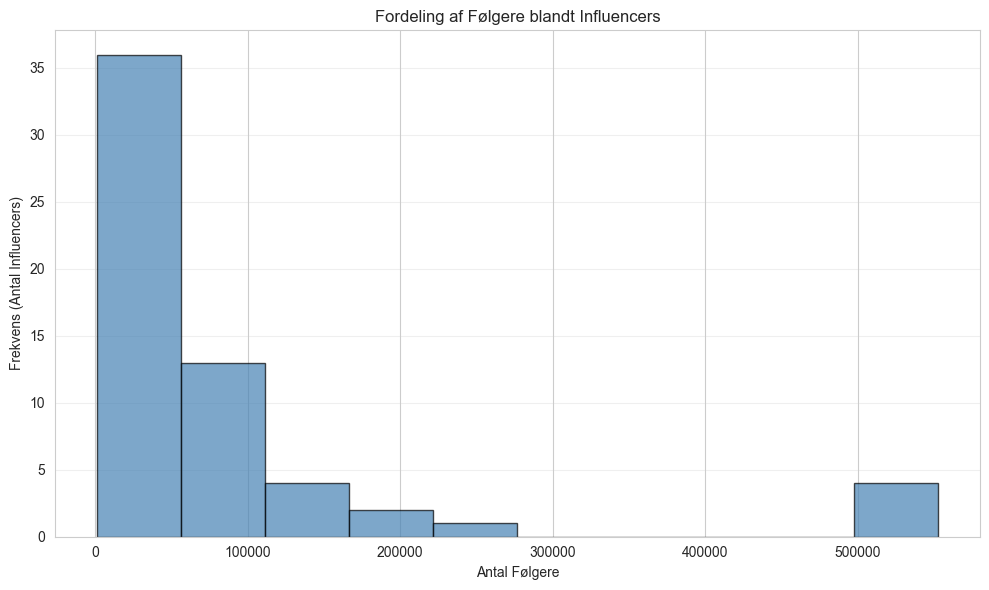

Hvad kan vi se?
- De fleste influencers har mellem 5,000-20,000 følgere
- Fordelingen er positivt skæv (lang højre hale)
- Nogle få influencers har meget høje følgertal (50,000+)


In [ ]:
# Histogram af antal følgere
plt.figure(figsize=(10, 6))
plt.hist(df['followers'], bins=10, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Antal Følgere')
plt.ylabel('Frekvens (Antal Influencers)')
plt.title('Fordeling af Følgere blandt Influencers')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

print("Hvad kan vi se?")
print("- De fleste influencers har mellem 5,000-20,000 følgere")
print("- Fordelingen er positivt skæv (lang højre hale)")
print("- Nogle få influencers har meget høje følgertal (50,000+)")


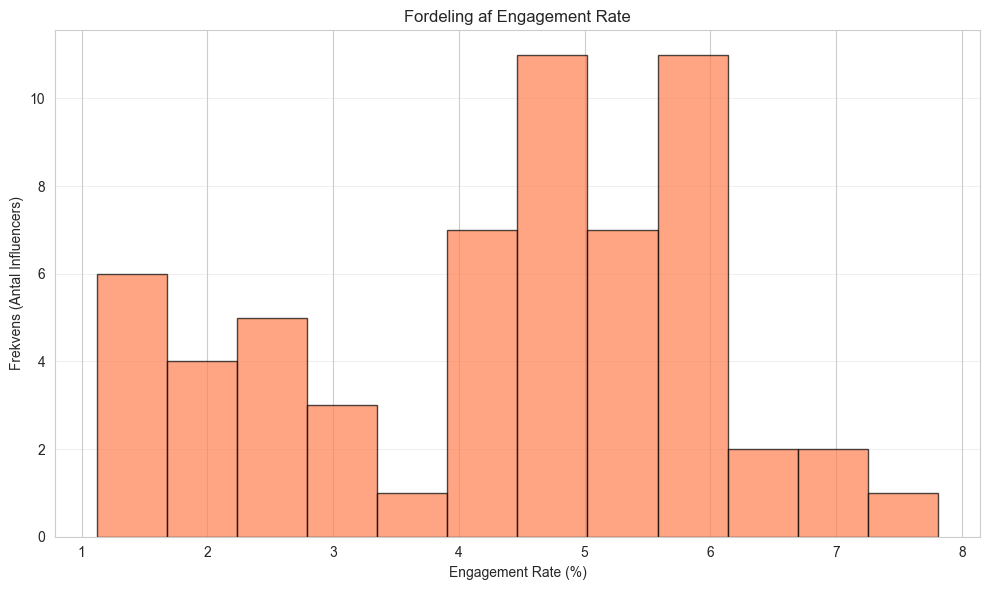

Hvad kan vi se?
- Engagement rate ligger typisk mellem 2-6%
- Fordelingen er mere symmetrisk end følgere
- Få outliers med meget høj eller lav engagement


In [71]:
# Histogram af engagement rate
plt.figure(figsize=(10, 6))
plt.hist(df['engagement_rate'], bins=12, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frekvens (Antal Influencers)')
plt.title('Fordeling af Engagement Rate')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Hvad kan vi se?")
print("- Engagement rate ligger typisk mellem 2-6%")
print("- Fordelingen er mere symmetrisk end følgere")
print("- Få outliers med meget høj eller lav engagement")

### 4.2 Bar Chart - Sammenligning af Kategorier

Bar charts bruges til at sammenligne kategoriske data.

✅ Images saved!


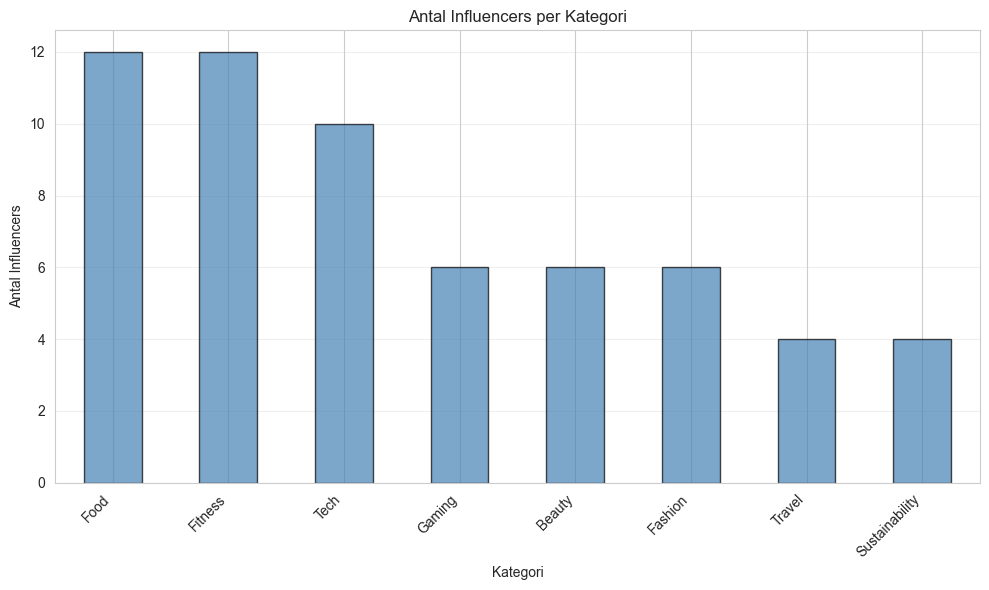


Antal per kategori:
category
Food              12
Fitness           12
Tech              10
Gaming             6
Beauty             6
Fashion            6
Travel             4
Sustainability     4
Name: count, dtype: int64


In [ ]:
# Tæl antal influencers per kategori
category_counts = df['category'].value_counts().sort_values(ascending=False)

# Lav bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Kategori')
plt.ylabel('Antal Influencers')
plt.title('Antal Influencers per Kategori')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

print("\nAntal per kategori:")
print(category_counts)

### 4.3 Pie Chart - Andele af Helheden

Pie charts viser hvordan noget fordeler sig proportionalt.

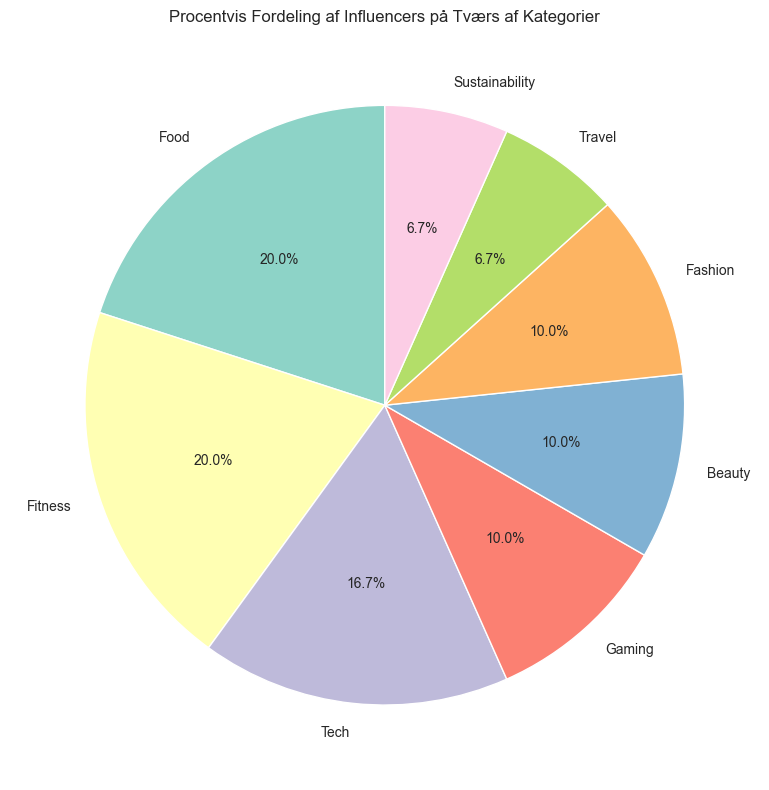

Hvad kan vi se?
- Tech og Fitness er de største kategorier
- Sustainability er den mindste kategori
- Fordelingen er relativt jævn på tværs af kategorier


In [72]:
# Pie chart af kategorier
plt.figure(figsize=(10, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                     colors=sns.color_palette('Set3', len(category_counts)))
plt.ylabel('')  # Fjern y-label
plt.title('Procentvis Fordeling af Influencers på Tværs af Kategorier')
plt.tight_layout()
plt.show()

print("Hvad kan vi se?")
print("- Tech og Fitness er de største kategorier")
print("- Sustainability er den mindste kategori")
print("- Fordelingen er relativt jævn på tværs af kategorier")

## Del 5: Bivariate Visualiseringer

Nu kigger vi på sammenhænge mellem **to** variable.

### 5.1 Scatter Plot - Sammenhæng Mellem To Numeriske Variable

✅ Images saved!


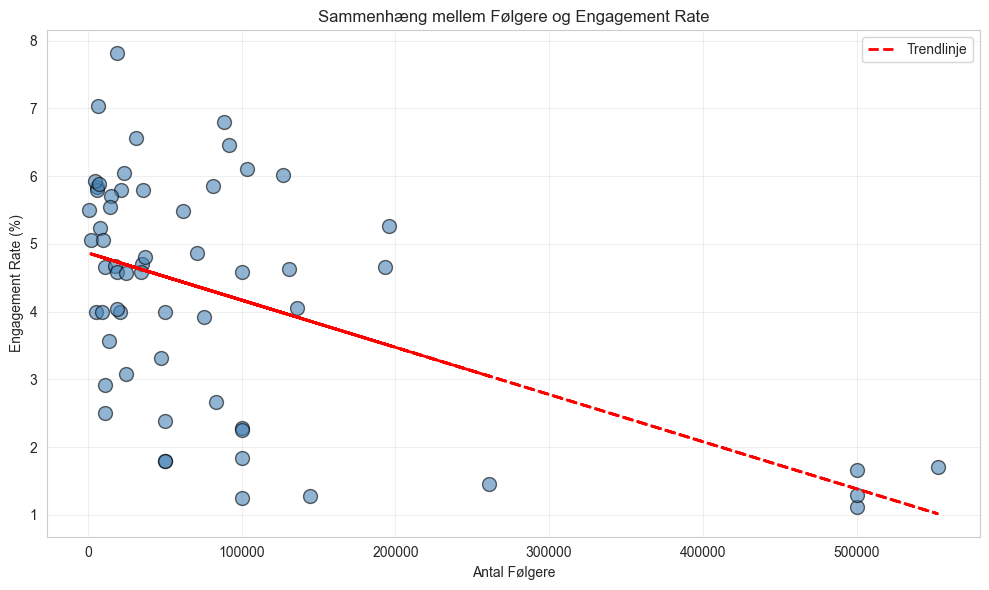

Hvad kan vi se?
- Der er en NEGATIV sammenhæng mellem følgere og engagement
- Influencers med færre følgere har ofte højere engagement rate
- Dette tyder på at mindre konti har mere engagerede følgere


In [ ]:
# Scatter plot: Følgere vs. Engagement Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['followers'], df['engagement_rate'], alpha=0.6, s=100, color='steelblue', edgecolor='black')

# Tilføj trendlinje
z = np.polyfit(df['followers'], df['engagement_rate'], 1)
p = np.poly1d(z)
plt.plot(df['followers'], p(df['followers']), "r--", linewidth=2, label='Trendlinje')

plt.xlabel('Antal Følgere')
plt.ylabel('Engagement Rate (%)')
plt.title('Sammenhæng mellem Følgere og Engagement Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Hvad kan vi se?")
print("- Der er en NEGATIV sammenhæng mellem følgere og engagement")
print("- Influencers med færre følgere har ofte højere engagement rate")
print("- Dette tyder på at mindre konti har mere engagerede følgere")

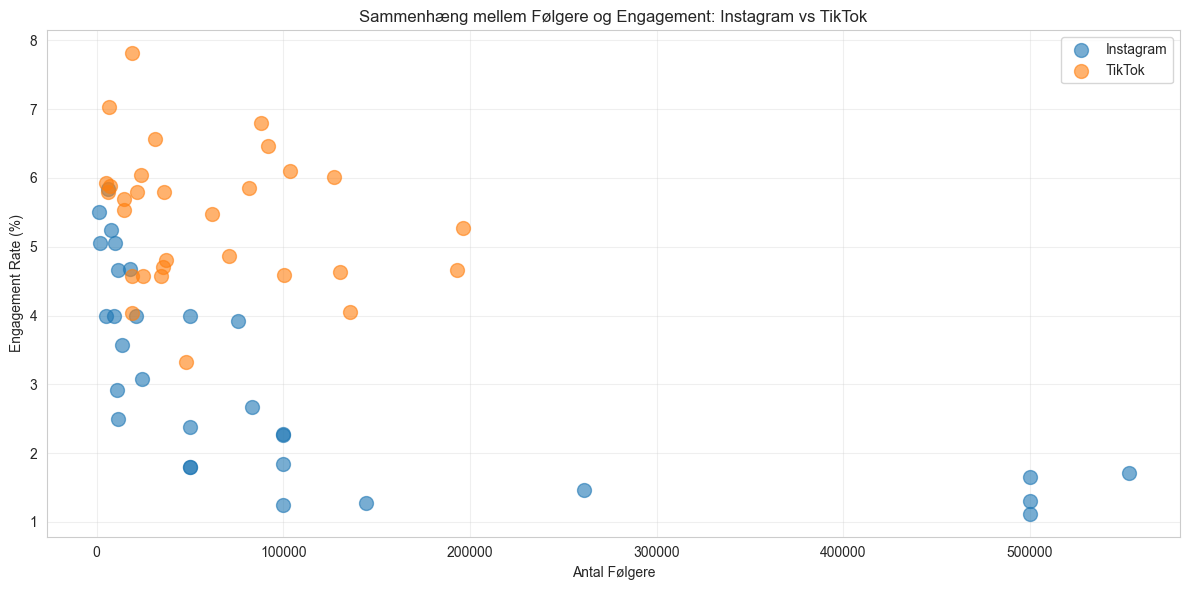

In [ ]:
# Alternativ Visualiseringsmdetode: Farv punkter efter platform
plt.figure(figsize=(12, 6))

for platform in df['platform'].unique():
    data = df[df['platform'] == platform]
    plt.scatter(data['followers'], data['engagement_rate'], 
                alpha=0.6, s=100, label=platform)
                
plt.xlabel('Antal Følgere')
plt.ylabel('Engagement Rate (%)')
plt.title('Sammenhæng mellem Følgere og Engagement: Instagram vs TikTok')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Line Plot - Udvikling Over Tid (Workshop Eksempel)

Nu kigger vi på et eksempel fra workshoppen: Medicare Part A omkostninger fra 1966-2015.

Dette viser hvordan man visualiserer udvikling over tid - en meget vigtig type analyse i erhvervslivet!

In [74]:
# Del 4b: Line Plot - Udvikling Over Tid

# Line plot bruges til at vise udvikling/trends over tid
# Vi bruger et andet datasæt: Medicare omkostninger 1966-2015 (fra jeres lærebog)

# Import Medicare data fra GitHub
url_medicare = 'https://raw.githubusercontent.com/aaubs/AnvendtStatistik2026/main/Data/Xr03-32.xlsx'
df_medicare = pd.read_excel(url_medicare)

print("Medicare data indlæst!")
print(df_medicare.head())

Medicare data indlæst!
   Year  Part A (Hospital Insurance)
0  1966                         0.06
1  1967                         2.26
2  1968                         3.53
3  1969                         3.99
4  1970                         4.32


✅ Images saved!


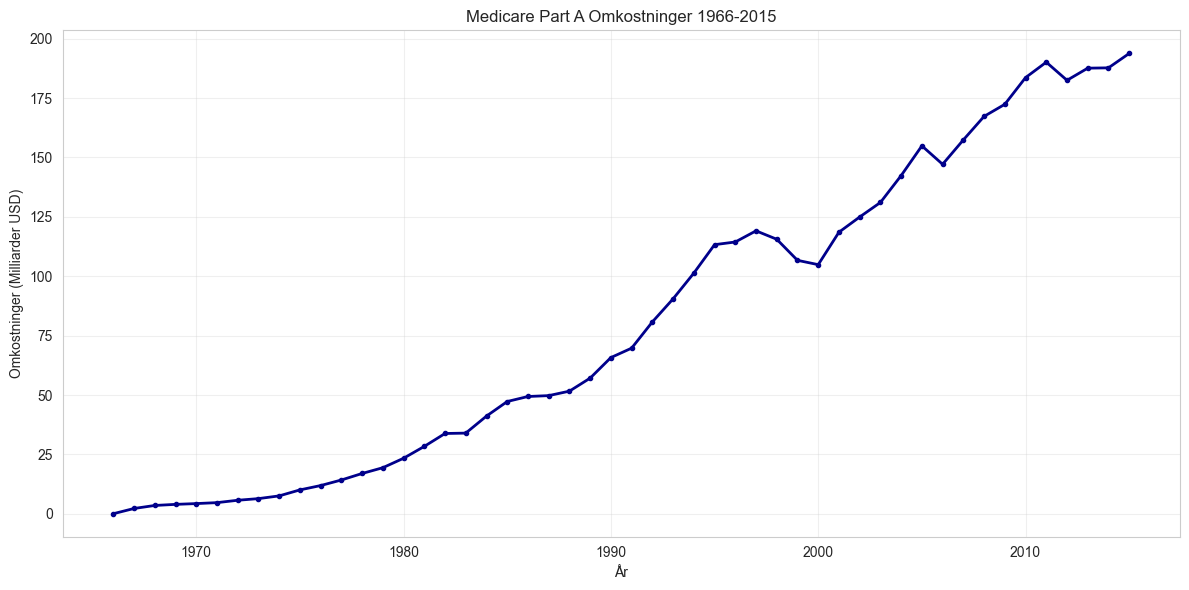


Hvad kan vi se?
- Klar STIGENDE trend over tid
- Omkostninger er steget fra $0.06 mia. (1966) til $362.4 mia. (2015)
- Væksten accelererer især fra 1990'erne og frem
- Total stigning: 322867% over 50 år


In [ ]:
# Line plot af Medicare omkostninger
plt.figure(figsize=(12, 6))
plt.plot(df_medicare['Year'], df_medicare['Part A (Hospital Insurance)'], 
         marker='o', markersize=3, linewidth=2, color='darkblue')

plt.xlabel('År')
plt.ylabel('Omkostninger (Milliarder USD)')
plt.title('Medicare Part A Omkostninger 1966-2015')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nHvad kan vi se?")
print("- Klar STIGENDE trend over tid")
print("- Omkostninger er steget fra $0.06 mia. (1966) til $362.4 mia. (2015)")
print("- Væksten accelererer især fra 1990'erne og frem")
print(f"- Total stigning: {((df_medicare.iloc[-1, 1] / df_medicare.iloc[0, 1]) - 1) * 100:.0f}% over 50 år")

### 5.3 Grouped Bar Chart - Sammenligning På Tværs af Kategorier

Vi sammenligner gennemsnitlig engagement rate på tværs af kategorier.

In [48]:
# Grouped bar chart viser numeriske værdier opdelt i grupper
# Vi undersøger: Hvordan adskiller engagement sig mellem platforme og kategorier?

# Først beregner vi gennemsnitlig engagement per kategori OG platform
engagement_by_platform = df.groupby(['category', 'platform'])['engagement_rate'].mean().reset_index()

print("Gennemsnitlig engagement per kategori og platform:")
print(engagement_by_platform)

Gennemsnitlig engagement per kategori og platform:
          category   platform  engagement_rate
0           Beauty  Instagram         2.073333
1           Beauty     TikTok         3.803333
2          Fashion  Instagram         2.356667
3          Fashion     TikTok         5.546667
4          Fitness  Instagram         2.588333
5          Fitness     TikTok         5.166667
6             Food  Instagram         3.056667
7             Food     TikTok         5.133333
8           Gaming  Instagram         2.916667
9           Gaming     TikTok         5.720000
10  Sustainability  Instagram         4.085000
11  Sustainability     TikTok         6.300000
12            Tech  Instagram         4.148000
13            Tech     TikTok         6.466000
14          Travel  Instagram         3.995000
15          Travel     TikTok         5.670000


**Hvornår bruges grouped bar chart?**
- Når vi vil sammenligne en **numerisk variabel** (engagement_rate) på tværs af **to kategoriske variable** (category + platform)
- For at se forskelle MELLEM grupper
- Når vi har 2-4 grupper at sammenligne

**Vores spørgsmål:**
Hvordan adskiller engagement rate sig mellem Instagram og TikTok på tværs af forskellige kategorier?

✅ Images saved!


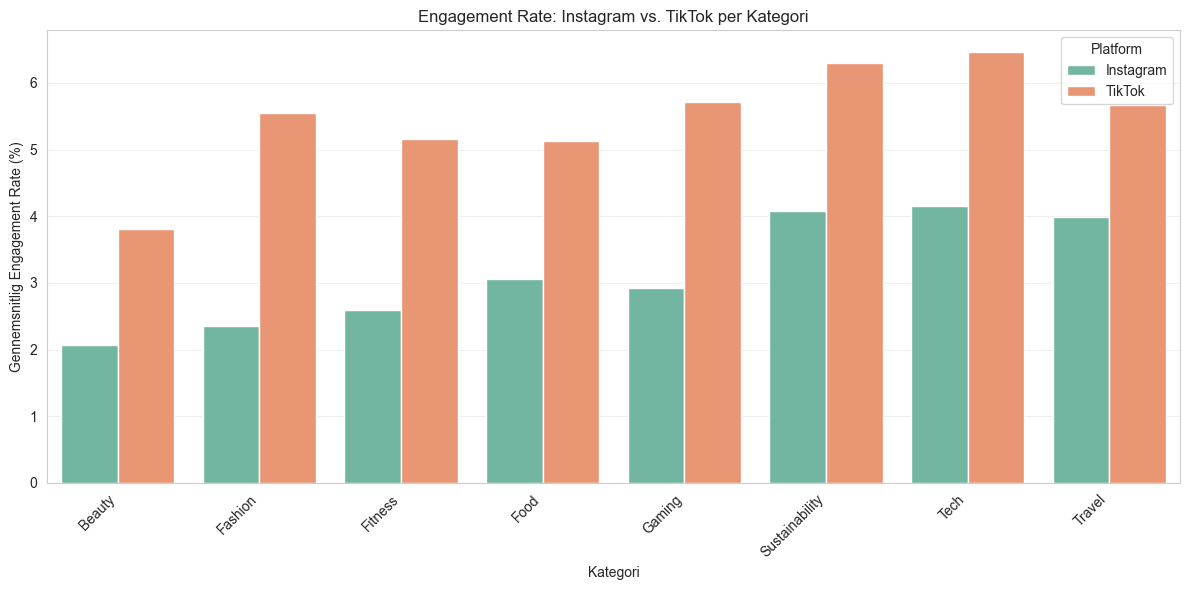


Hvad kan vi se?
- TikTok har KONSISTENT højere engagement end Instagram på tværs af alle kategorier
- Størst forskel: Fashion (TikTok er ~2.3x Instagram)
- Mindst forskel: Travel (TikTok er ~1.4x Instagram)
- Tech og Sustainability performer bedst på begge platforme
- Beauty og Fashion har lavest engagement på Instagram


In [ ]:
# Lav grouped bar chart med seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_by_platform, x='category', y='engagement_rate', hue='platform', palette="Set2")
# Palette: https://seaborn.pydata.org/generated/seaborn.color_palette.html

plt.xlabel('Kategori')
plt.ylabel('Gennemsnitlig Engagement Rate (%)')
plt.title('Engagement Rate: Instagram vs. TikTok per Kategori')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nHvad kan vi se?")
print("- TikTok har KONSISTENT højere engagement end Instagram på tværs af alle kategorier")
print("- Størst forskel: Fashion (TikTok er ~2.3x Instagram)")
print("- Mindst forskel: Travel (TikTok er ~1.4x Instagram)")
print("- Tech og Sustainability performer bedst på begge platforme")
print("- Beauty og Fashion har lavest engagement på Instagram")

### Del 5.4 Stacked Bar Chart - Sammensætning og Total
Stacked bar chart viser BÅDE total og hvordan den er sammensat

Vi undersøger: Hvordan fordeler influencers sig på tiers inden for hver kategori?

In [54]:
# Tæl antal influencers per kategori og follower tier
tier_counts = df.groupby(['category', 'follower_tier']).size().reset_index(name='count')

print("Antal influencers per kategori og tier:")
print(tier_counts)

Antal influencers per kategori og tier:
          category   follower_tier  count
0           Beauty  Mid (10k-100k)      3
1           Beauty   Macro (100k+)      3
2          Fashion    Micro (<10k)      1
3          Fashion  Mid (10k-100k)      1
4          Fashion   Macro (100k+)      4
5          Fitness  Mid (10k-100k)      8
6          Fitness   Macro (100k+)      4
7             Food    Micro (<10k)      1
8             Food  Mid (10k-100k)      8
9             Food   Macro (100k+)      3
10          Gaming    Micro (<10k)      1
11          Gaming  Mid (10k-100k)      3
12          Gaming   Macro (100k+)      2
13  Sustainability    Micro (<10k)      2
14  Sustainability  Mid (10k-100k)      2
15            Tech    Micro (<10k)      4
16            Tech  Mid (10k-100k)      5
17            Tech   Macro (100k+)      1
18          Travel    Micro (<10k)      1
19          Travel  Mid (10k-100k)      3


In [55]:
# For stacked bar charts skal data være i "wide format" (én kolonne per tier)
# Vi bruger pivot() til at reorganisere dataen
tier_pivot = tier_counts.pivot(index='category', columns='follower_tier', values='count')

# Fyld manglende værdier med 0 (hvis en kategori ikke har nogen i en tier)
tier_pivot = tier_pivot.fillna(0)

print("\nData efter pivot (klar til plotting):")
print(tier_pivot)


Data efter pivot (klar til plotting):
follower_tier   Micro (<10k)  Mid (10k-100k)  Macro (100k+)
category                                                   
Beauty                   0.0             3.0            3.0
Fashion                  1.0             1.0            4.0
Fitness                  0.0             8.0            4.0
Food                     1.0             8.0            3.0
Gaming                   1.0             3.0            2.0
Sustainability           2.0             2.0            0.0
Tech                     4.0             5.0            1.0
Travel                   1.0             3.0            0.0


### Hvad gør pivot()?

For stacked bar charts kræver matplotlib/pandas at data er i **wide format**:
- Hver række = en kategori
- Hver kolonne = en tier
- Værdierne = antal

**Før pivot (long format):**
```
category    follower_tier    count
Tech        Micro            4
Tech        Mid              5
Tech        Macro            1
```

**Efter pivot (wide format):**
```
              Micro  Mid  Macro
Tech            4    5    1
Food            1    8    3
...
```

Dette er nødvendigt for at lave stacked bars!

✅ Images saved!


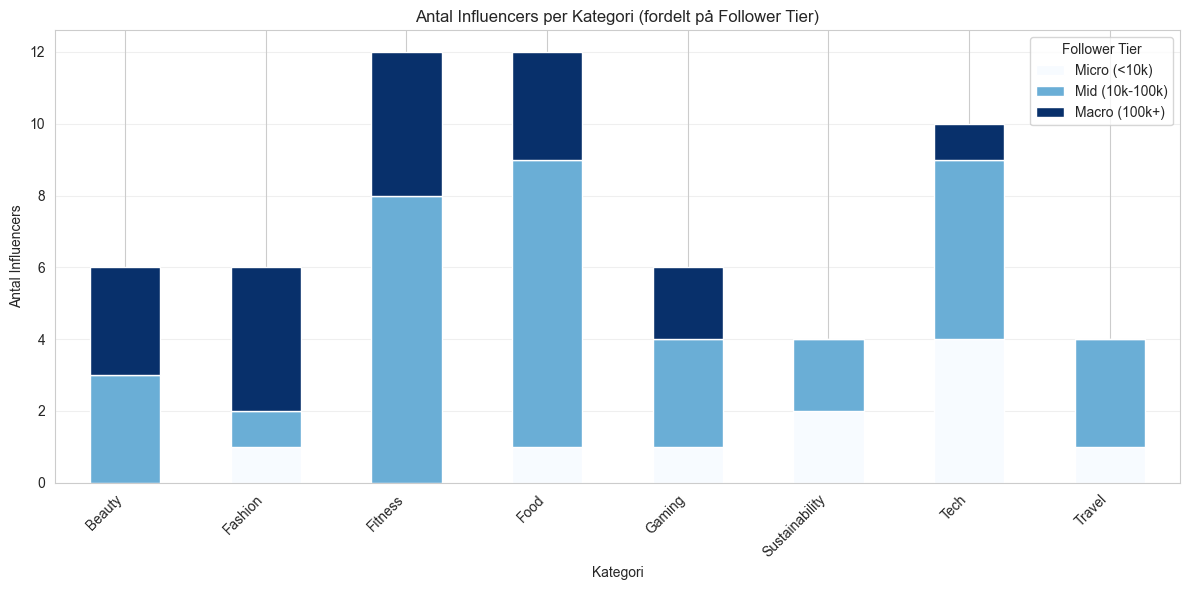


Hvad kan vi se?
- Fitness og Food har flest influencers i alt (12 hver)
- Fashion har flest Macro influencers (4 ud af 6)
- Tech har flest Micro influencers (4 ud af 10)
- Sustainability har KUN Micro og Mid (ingen Macro)
- Travel har KUN Micro og Mid (ingen Macro)


In [ ]:
# Lav stacked bar chart
tier_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Blues')
# Colormap: https://matplotlib.org/stable/gallery/color/colormap_reference.html

plt.xlabel('Kategori')
plt.ylabel('Antal Influencers')
plt.title('Antal Influencers per Kategori (fordelt på Follower Tier)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Follower Tier', labels=['Micro (<10k)', 'Mid (10k-100k)','Macro (100k+)'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nHvad kan vi se?")
print("- Fitness og Food har flest influencers i alt (12 hver)")
print("- Fashion har flest Macro influencers (4 ud af 6)")
print("- Tech har flest Micro influencers (4 ud af 10)")
print("- Sustainability har KUN Micro og Mid (ingen Macro)")
print("- Travel har KUN Micro og Mid (ingen Macro)")

## Opsummering

I denne notebook har vi lært:

### Datatyper
- **Interval**: Numeriske data (kan beregne gennemsnit, median, osv.)
- **Nominal**: Kategoriske data uden rækkefølge (kan tælle frekvenser)
- **Ordinal**: Kategoriske data med rækkefølge (kan rangordne)

### Univariate Visualiseringer (én variabel)
- **Histogram**: Viser fordeling af numeriske data
- **Bar Chart**: Sammenligner kategorier
- **Pie Chart**: Viser andele af en helhed

### Bivariate Visualiseringer (to variable)
- **Scatter Plot**: Viser sammenhæng mellem to numeriske variable (+ trendlinje)
- **Line Plot**: Viser udvikling over tid
- **Grouped Bar Chart**: Sammenligner numeriske værdier på tværs af kategorier
- **Stacked Bar Chart**: Du vil sammenligne værdier mellem grupper

---

**Næste skridt**: I workshoppen skal I selv arbejde med disse teknikker på forskellige datasæt. Husk:
1. Identificer datatypen først
2. Vælg den rigtige visualisering
3. Beskriv hvad I ser (form, mønster, outliers)
4. Fortolk resultatet i kontekst

Held og lykke! 🚀